# Model Project - Consumer Problem

This project has to purpose to find the optimal consumption, for a consumer. We are given an utility function and the price of the two goods. The optimal consumption for the consumer is determined both numerically, algebraically. An interactive solution is also presented. In addition, this project will be using theory from Microeconomics I, and rather generous inspiration will be taken from exercise 2 on the Winter 2016 exam.

In [30]:
#Importing packages
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

## The Consumers Utility

This problem we will be looking at, is the way the consumer is utilizing their 2 given goods, x1 and x2

$$ u(x_1,x_2)=x_1x_2+2x_2 $$

This function is then defined

In [53]:
def u(x1,x2):
    u = x1*x2 + 2 * x2
    return u

In [91]:
def U(x1,x2):
    return x1x2 + 2*x2

Furthermore, we are assuming that the following is true

$$ p1,p2, I>0 $$

Now, to illustrate the consumers utility which was just defined above, a 3d plot will be made

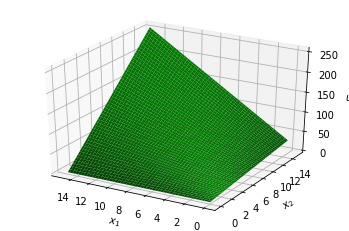

In [54]:
# First things first
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

# Vectors, range 0 to 15
x1_vec = np.linspace(0,15,150)
x2_vec = np.linspace(0,15,150)

# Grid
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec)

# Utility function within the grid
u_grid = u(x1_grid, x2_grid)

# PLotting
ax.plot_surface(x1_grid, x2_grid, u_grid, color='g')

# Labels and inv axes
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()

## The Utility Maximization Problem

The following utility maximization problem is considered

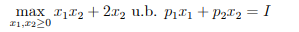

The variables given will be defined as sympy symbols, which will make it possible for us to do equations

In [138]:
# From variables to sympy symbols
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')

Furthermore, a toggle will be enabled, so we can see the result after each equation

In [139]:
sm.init_printing(use_unicode=True)

Now the utility function can be constructed using sympy

In [140]:
U = sm.Eq(x1*x2+2*x2,U)
U

And the budget constraint

In [116]:
BC= sm.Eq(p1*x1 + p2*x2,I)
BC

Now, the goal here is to isolate x1 and x2, as we wish to find the consumers demand

In [117]:
# Isolating x1
x1cons = sm.solve(BC,x1)
x1cons[0]

Now, the result here will be substituted into the utility function

In [118]:
# Substituting into utility function
Usubx1 = U.subs(x1, x1cons[0])
Usubx1

This enables us to find the derivative, with respect to x2

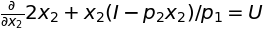

In [119]:
FOCx2 = sm.diff(Usubx1, x2)
FOCx2

Now focx2 is set equal to 0, and solved for x2

In [135]:
SOLx2 = sm.solve(sm.Eq(FOCx2,0),x2)

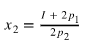

The reverse is now done to find x1

In [128]:
x2cons=sm.solve(BC,x2)
x2cons

In [129]:
Usubx2 = U.subs(x2,x2cons[0])
Usubx2

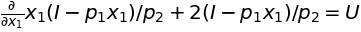

In [130]:
FOCx1=sm.diff(Usubx2,x1)
FOCx1

In [132]:
SOLx1=sm.solve(sm.Eq(0,FOCx1),x1)

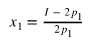

## Applying the solutions for x1 and x2

In this case, the values will be as following

In [67]:
I = 24
p1 = 6
p2 = 1.5

In [68]:
# Defining x1 and x2
def x1function(p1,p2,I):
    return (I/2 - p1)/p1

def x2function(p1,p2,I):
    return (I/2 + p1)/p2

Now, the values of this case will be applied

In [69]:
# Applying values
print('x1 =',x1function(6,1.5,24))
print('x2 =',x2function(6,1.5,24))
print('U =',u(x1function(6,1.5,24),x2function(6,1.5,24)))

x1 = 1.0
x2 = 12.0
U = 36.0


Now, a graphic display will be made to show the results

In [70]:
# Making it possible to plot in the same graph, by isolating x2 in the 2 functions
Step1 = sm.solve(BC,x2)
Step2 = sm.solve(U,x2)

In [71]:
print(Step1)

[(I - p_1*x_1)/p_2]


In [72]:
print(Step2)

[U/(x_1 + 2)]


Now, the curves that are gonna be used in making the graphs, will be defined

In [73]:
# Defining the curves
def indiff (x1,u,p1,p2):
    return u/(x1+2)

def budget (x1,I,p1,p2):
    return(I-p1*x1)/p2

Now the graphs will be made

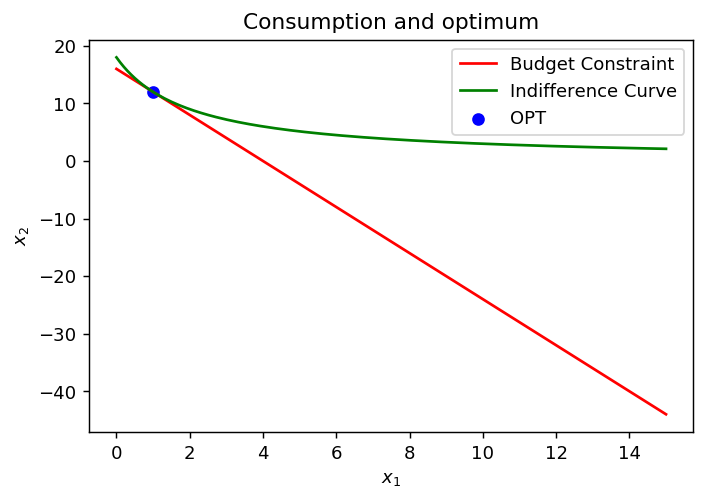

In [74]:
# Plotting the curves and optimum point (OPT)
fig = plt.figure(dpi=130)
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,24,6,1.5),label='Budget Constraint', color='r') 
ax.plot(x1_vec,indiff(x1_vec,36,6,1.5),label='Indifference Curve', color ='g')
ax.scatter(x1function(6,1.5,24),x2function(6,1.5,24),u(x1function(6,1.5,24),x2function(6,1.5,24)),color='b',label='OPT')

# Labels and titles
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Consumption and optimum')
ax.legend();

And the values

In [75]:
print('x1 =',x1function(6,1.5,24))
print('x2 =',x2function(6,1.5,24))
print('U =', u(x1function(6,1.5,24),x2function(6,1.5,24)))
print('I-p1*x1-p2*x2 =',24-6*x1function(6,1.5,24)-1.5*x2function(6,1.5,24))

x1 = 1.0
x2 = 12.0
U = 36.0
I-p1*x1-p2*x2 = 0.0


## Interactive Solution

As we want to visualize the consumption bundle, for various prices and incomes, an interactive chart is plotted, where the buydget constraint, indiff curve and optimum all rely on prices and incomes.
Furthermore, the two indifference curves above and below the optimal curve is plotted, to visualize the given change.

In [76]:
#Defining plot
def _figure(x1_vec, I, p2, p1):
    fig=plt.figure(dpi=60)
    ax = fig.add_subplot(1, 1, 1)
    x1_vec = np.linspace(0, 2.3*x1function(p1, p2, I), 40)
    x2_vec = np.linspace(0, 2.3*x2function(p1, p2, I), 40)
    ax.plot(x1_vec,budget(x1_vec,I,p1,p2),label="BC")
    x1 = x1function(p1,p2,I) 
    x2 = x2function(p1,p2,I) 
    
    #Defining utility
    u_plot = x1*x2 + 2*x2 
    ax.plot(x1_vec,indiff(x1_vec,u_plot,p1,p2),label="Indiff curve in optimum")
    ax.plot(x1_vec,indiff(x1_vec,u_plot*0.5,p1,p2),label="Indiff Curve x0.5")
    ax.plot(x1_vec,indiff(x1_vec,u_plot*1.5,p1,p2),label="Indiff Curve x1.5")
    ax.scatter(x1,x2,color='red',label='Optimum')
    plt.title('Optimal Consumption Bundle')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend();
    plt.grid(which = 'both')

#Plotting p1, p2 and I
import ipywidgets as widgets
widgets.interact(_figure, 
                x1_vec = widgets.fixed(x1_vec), 
                I = widgets.FloatSlider(description="$I$", min=0.1, max=50, step=0.01, value=16),
                p2 = widgets.FloatSlider(description="$p_2$", min=0.01, max=16, step=0.01, value=1),
                p1 = widgets.FloatSlider(description="$p_1$", min=0.01, max=16, step=0.01, value=1));

interactive(children=(FloatSlider(value=16.0, description='$I$', max=50.0, min=0.1, step=0.01), FloatSlider(va…

We notice in the graph, that for $I \leq 2p_1$, a negative value for $x_1$ is required for a solution.

## Solution by analysing

Here, scipy will be used to solve it numerically, for the same values as before,

In [77]:
I = 24
p1 = 6
p2 = 1.5

Now, onto redefining the utility function

In [78]:
# New utility function
def U_new(x1,x2):
    return x1*x2+2*x2

A new indifference curve is defined, with a minimizer

In [79]:
# New indifference curve
def I_function(x1,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -U_new(x1,x2)

Now, onto using the scipy solver

In [80]:
# Scipy Solve
ScipySolve = optimize.minimize_scalar(I_function,method='bounded',bounds=(0,I/p2),args=(I,p1,p2))

Taking and breaking down the solution

In [81]:
# Simplyfying the scipy solution
x1 = ScipySolve.x
x2 = (I-p1*x1)/p2
U_func = U_new(x1,x2)

And then onto printing!

In [87]:
# Printing the solution
print(f'x1={x1:.1f}')
print(f'x2={x2:.1f}')
print(f'U={U_func:.1f}')
print(f'I-p1*x1-p2*x2={I-p1*x1-p2*x2:.2f}')

x1=1.0
x2=12.0
U=36.0
I-p1*x1-p2*x2=0.00


This result is now compared to the one we found earlier

In [86]:
print('x1 =',x1function(6,1.5,24))
print('x2 =',x2function(6,1.5,24))
print('U =', u(x1function(6,1.5,24),x2function(6,1.5,24)))
print('I-p1*x1-p2*x2 =',24-6*x1function(6,1.5,24)-1.5*x2function(6,1.5,24))

x1 = 1.0
x2 = 12.0
U = 36.0
I-p1*x1-p2*x2 = 0.0


And we rightfully see, that they are identical